In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

In [16]:
#read out the structure from alphafold on greene and pdb downloaded from rcsb website
alphafold_structure = []

alphafold_structure.append(md.load_pdb('./unrelaxed_model_1_pred_0.pdb'))
alphafold_structure.append(md.load_pdb('./unrelaxed_model_2_pred_0.pdb'))
alphafold_structure.append(md.load_pdb('./unrelaxed_model_3_pred_0.pdb'))
alphafold_structure.append(md.load_pdb('./unrelaxed_model_4_pred_0.pdb'))
alphafold_structure.append(md.load_pdb('./unrelaxed_model_5_pred_0.pdb'))

crystal_structure=md.load_pdb('./3ry2.pdb')

In [18]:
#slice crystal structure as the reference structure
crystal_structure_sliced = crystal_structure.atom_slice(crystal_structure.top.select('chainid 0'))

rmsd_AC = []
rmsd_BB = []
rmsd_SC = []

for i in alphafold_structure:
    rmsd_AC.append(md.rmsd(i,crystal_structure_sliced, atom_indices = crystal_structure_sliced.top.select('name CA')))#alpha carbon
    rmsd_BB.append(md.rmsd(i,crystal_structure_sliced, atom_indices = crystal_structure_sliced.top.select('backbone')))#Backbone
    rmsd_SC.append(md.rmsd(i,crystal_structure_sliced, atom_indices = crystal_structure_sliced.top.select('sidechain')))#Sidechain

In [19]:
print(rmsd_AC[0])

[0.46276253]


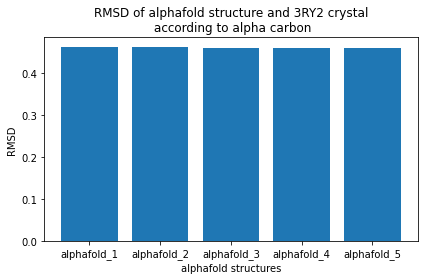

In [30]:
ticks = ['alphafold_1','alphafold_2','alphafold_3','alphafold_4','alphafold_5']

plt.bar(ticks, np.array(rmsd_AC).flatten())
plt.xlabel('alphafold structures')
plt.ylabel('RMSD')
plt.title('RMSD of alphafold structure and 3RY2 crystal\n according to alpha carbon')
plt.tight_layout()
#plt.savefig('RMSD_alphacarbon.pdf')
plt.show()

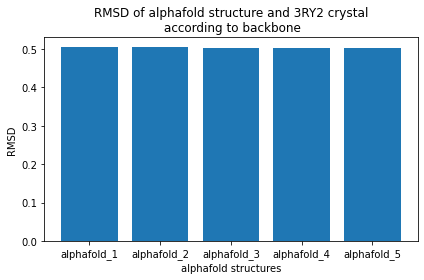

In [31]:
ticks = ['alphafold_1','alphafold_2','alphafold_3','alphafold_4','alphafold_5']

plt.bar(ticks, np.array(rmsd_BB).flatten())
plt.xlabel('alphafold structures')
plt.ylabel('RMSD')
plt.title('RMSD of alphafold structure and 3RY2 crystal\n according to backbone')
plt.tight_layout()
#plt.savefig('RMSD_backbone.pdf')
plt.show()

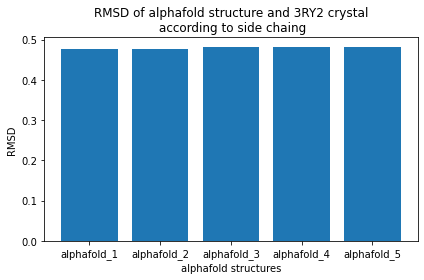

In [32]:
ticks = ['alphafold_1','alphafold_2','alphafold_3','alphafold_4','alphafold_5']

plt.bar(ticks, np.array(rmsd_SC).flatten())
plt.xlabel('alphafold structures')
plt.ylabel('RMSD')
plt.title('RMSD of alphafold structure and 3RY2 crystal\n according to side chaing')
plt.tight_layout()
#plt.savefig('RMSD_sidechain.pdf')
plt.show()